<a href="https://colab.research.google.com/github/prabutlv/Projects-/blob/main/Zee_Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.36.3 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
rasterio 1.5.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; pyth

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!gdown 1-xsSNizet0ruiMgKLWRcmme8L_iDejhc

Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 16.9MB/s]


In [3]:
!gdown 1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk

Downloading...
From: https://drive.google.com/uc?id=1XJpSzv-UMeSmCCOdyZviRF4XCxiKJUrk
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 71.2MB/s]


In [4]:
!gdown 15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ

Downloading...
From: https://drive.google.com/uc?id=15QeQgmjoeBxRDEOFPSrMr8eIvwk6QgUQ
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 67.4MB/s]


In [83]:
ratings = pd.read_csv(
    "zee-ratings.dat",
    sep="::",
    engine="python",
    names=["user_id","movie_id","rating","timestamp"],
    header=None,
    skiprows=1
)

users = pd.read_csv(
    "zee-users.dat",
    sep="::",
    engine="python",
    names=["user_id","gender","age","occupation","zip"],
    header=None,
    skiprows=1
)

movies = pd.read_csv(
    "zee-movies.dat",
    sep="::",
    engine="python",
    names=["movie_id","title","genres"],
    encoding="latin1",
    header=None,
    skiprows=1
)

In [6]:
print(f'User DF : {users.shape} \nRating DF :  {ratings.shape} \nMovies DF : {movies.shape}')

User DF : (6040, 5) 
Rating DF :  (1000209, 4) 
Movies DF : (3883, 3)


In [7]:
print(f'User DF Columns : {users.columns}, \nRating DF Columns : {ratings.columns}, \nMovies DF columns : {movies.columns}')

User DF Columns : Index(['user_id', 'gender', 'age', 'occupation', 'zip'], dtype='object'), 
Rating DF Columns : Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object'), 
Movies DF columns : Index(['movie_id', 'title', 'genres'], dtype='object')


In [8]:
print(f'User DF Info:\n {users.info()}, \nRating DF Info :\n {ratings.info()}, \nMovies DF Info :\n {movies.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    ------------

In [9]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
print(f'User DF : {users.isna().sum()}, \n\nRating DF : {ratings.isna().sum()}, \n\nMovies DF : {movies.isna().sum()}')

User DF : user_id       0
gender        0
age           0
occupation    0
zip           0
dtype: int64, 

Rating DF : user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64, 

Movies DF : movie_id    0
title       0
genres      0
dtype: int64


In [13]:
users.describe(include="all")

,user_id,gender,age,occupation,zip
count,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3020.500000,NaN,30.639238,8.146854,NaN
std,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,1.000000,0.000000,NaN
25%,1510.750000,NaN,25.000000,3.000000,NaN
50%,3020.500000,NaN,25.000000,7.000000,NaN
75%,4530.250000,NaN,35.000000,14.000000,NaN


In [14]:
ratings.describe(include="all")

,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [15]:
movies.describe(include="all")

,movie_id,title,genres
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Toy Story (1995),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN




**Define Problem Statement and Formatting the Data (20 points)**

    Definition of the problem (as per the given problem statement with additional views)




In [17]:
# Build a personalized movie recommender system using:

    # User–Item ratings

    # Similar users/items

    # Matrix Factorization

# Goal: Recommend movies that a user is likely to enjoy, based on past ratings and similar users/items.


    Formatting the data files to bring them into a workable format
    
    Merging the data files and creating a single consolidated dataframe

In [16]:
#Merge into one DataFrame

df = ratings.merge(users, on="user_id").merge(movies, on="movie_id")


In [17]:
df.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy




**Performing EDA, Data Cleaning, and Feature Engineering (20 Points)**

    Reviewing the shape and structure of the dataset

    Performing necessary type conversion and deriving new features

    Investigating the data for any inconsistency

    Group the data according to the average rating and no. of ratings




In [18]:
df.shape

(1000209, 10)

In [21]:
df

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip         1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [20]:
df.describe(include="all")

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1000209,1000209,1000209
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,3439,3706,301
top,NaN,NaN,NaN,NaN,M,NaN,NaN,94110,American Beauty (1999),Comedy
freq,NaN,NaN,NaN,NaN,753769,NaN,NaN,3802,3428,116883
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,NaN,2.973831e+01,8.036138e+00,NaN,NaN,NaN
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,NaN,1.175198e+01,6.531336e+00,NaN,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,NaN,1.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,NaN,2.500000e+01,2.000000e+00,NaN,NaN,NaN
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,NaN,2.500000e+01,7.000000e+00,NaN,NaN,NaN
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,NaN,3.500000e+01,1.400000e+01,NaN,NaN,NaN


In [21]:
df.isna().sum()

,0
user_id,0
movie_id,0
rating,0
timestamp,0
gender,0
age,0
occupation,0
zip,0
title,0
genres,0


In [22]:
# Extract Release Year

df["year"] = df["title"].str.extract(r"\((\d{4})\)").astype(float)


In [23]:
#Q1️ Users of which age group rated the most movies?

df.groupby("age")["rating"].count().idxmax()


25

In [25]:
# Q2️ Which profession watched most movies?


df.groupby("occupation")["rating"].count().idxmax()


4

**college/grad student(4) watched most movies **

In [26]:
#Q3️ Most users are Male (T/F)?

df["gender"].value_counts(normalize=True)


,proportion
gender,
M,0.753611
F,0.246389


** It is True 75% of gender is Male**

In [27]:
df["decade"] = (df["year"]//10)*10 # Removes the last digit
df["decade"].value_counts().idxmax()

1990.0

** 1990 is the decade most Movies released**

In [28]:
# Q5 Movie with maximum ratings
df.groupby("title")["rating"].count().idxmax()


'American Beauty (1999)'



**Build a Recommender System based on Pearson Correlation (10 Points)**

    Creating a pivot table of movie titles & user id and imputing the NaN values

    Use the Item-based approach to create a simple recommender system that uses Pearson Correlation



In [29]:
# Pivot Table (User–Item Matrix)

pivot = df.pivot_table(
    index="title", columns="user_id", values="rating"
)
pivot_filled = pivot.fillna(0)


In [33]:
pivot_filled

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Effect (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Item-Based CF – Pearson Correlation

item_corr = pivot.T.corr(method="pearson")

def recommend_pearson(movie, n=5):
    return (
        item_corr[movie]
        .sort_values(ascending=False)
        .iloc[1:n+1]
    )




In [31]:
# Q6️ Top 3 movies similar to Liar Liar

recommend_pearson("Liar Liar (1997)", 3)


,Liar Liar (1997)
title,
Liar Liar (1997),1.0
Those Who Love Me Can Take the Train (Ceux qui m'aiment prendront le train) (1998),1.0
Voyage of the Damned (1976),1.0




**Build a Recommender System based on Cosine Similarity. (20 Points)**

    Print the user similarity matrix and item similarity matrix

    Use the Item-based approach to create a recommender system that uses Nearest Neighbors algorithm and Cosine Similarity



In [32]:
# Cosine Similarity (Item & User)

from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(pivot_filled)
user_sim = cosine_similarity(pivot_filled.T)


In [33]:
# KNN Item-Based Recommender (Cosine)

from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric="cosine", algorithm="brute")
knn.fit(pivot_filled)

def recommend_knn(movie, n=5):
    idx = pivot_filled.index.get_loc(movie)
    distances, indices = knn.kneighbors(
        [pivot_filled.iloc[idx]], n_neighbors=n+1
    )
    return pivot_filled.index[indices.flatten()[1:]]


In [34]:
# Q6️ Top 3 movies similar to Liar Liar

recommend_knn("Liar Liar (1997)", 3)

Index(['Mrs. Doubtfire (1993)', 'Ace Ventura: Pet Detective (1994)',
       'Dumb & Dumber (1994)'],
      dtype='object', name='title')

**Q7.** On the basis of approach, Collaborative Filtering methods can be classified into **_User__** based and **_Item__** based.

**Q8.** Pearson Correlation ranges between **_-1_** to **_1__** whereas, Cosine Similarity belongs to the interval between **__0_** to **_1__**.

**Build a Recommender System based on Matrix Factorization. (30 Points)**

    Create a Recommender System using the Matrix Factorization method

    Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error

    Use embeddings for visualization and similarity-based models.



**Manual Matrix Factorization Code (SGD)**

In [75]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [91]:
# Train–Test Split

def train_test_split_df(df, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    mask = np.random.rand(len(df)) < (1 - test_size)
    return df[mask], df[~mask]


In [92]:
# Manual Matrix Factorization (Core Logic)

def matrix_factorization(
    ratings_df,
    n_users,
    n_items,
    k=4,
    lr=0.01,
    reg=0.02,
    n_epochs=20
):
    # Initialize embeddings
    P = np.random.normal(scale=1./k, size=(n_users, k))
    Q = np.random.normal(scale=1./k, size=(n_items, k))

    for epoch in range(n_epochs):
        for _, row in ratings_df.iterrows():
            u = int(row["user_idx"])
            i = int(row["item_idx"])
            r_ui = row['rating']

            # Prediction
            pred = np.dot(P[u], Q[i])
            error = r_ui - pred

            # SGD update
            P[u] += lr * (error * Q[i] - reg * P[u])
            Q[i] += lr * (error * P[u] - reg * Q[i])

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{n_epochs} completed")

    return P, Q


In [93]:
# Create ID → Index mappings

user_map = {u: idx for idx, u in enumerate(ratings["user_id"].unique())}
item_map = {i: idx for idx, i in enumerate(ratings["movie_id"].unique())}


In [94]:
# Replace IDs with indices

ratings["user_idx"] = ratings["user_id"].map(user_map)
ratings["item_idx"] = ratings["movie_id"].map(item_map)


In [95]:
# Train the Model

# ratings_df must have columns: UserID, MovieID, Rating
train_df, test_df = train_test_split_df(ratings)

n_users = ratings['user_id'].nunique()
n_items = ratings['movie_id'].nunique()

P, Q = matrix_factorization(train_df,
    n_users,
    n_items,
    k=4,
    lr=0.01,
    reg=0.02,
    n_epochs=30
)


Epoch 5/30 completed
Epoch 10/30 completed
Epoch 15/30 completed
Epoch 20/30 completed
Epoch 25/30 completed
Epoch 30/30 completed


In [119]:
# Create ID → index mappings

user_map = {u: idx for idx, u in enumerate(train_df["user_id"].unique())}
item_map = {i: idx for idx, i in enumerate(train_df["movie_id"].unique())}


In [121]:
# Build P and Q using mapped sizes

n_users = len(user_map)
n_items = len(item_map)
k=4

P = np.random.rand(n_users, k)
Q = np.random.rand(n_items, k)


In [122]:
# Use mapped indices during prediction

def predict(P, Q, df, user_map, item_map):
    actuals, preds = [], []

    for _, row in df.iterrows():
        u = user_map.get(row["user_id"])
        i = item_map.get(row["movie_id"])

        if u is None or i is None:
            continue  # cold start → skip

        preds.append(np.dot(P[u], Q[i]))
        actuals.append(row["rating"])

    return np.array(actuals), np.array(preds)


**Q9.** Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

In [123]:
# Metrics

actual, predicted = predict(P, Q, test_df, user_map, item_map)

rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 2.8451040132189593
MAPE: 69.03292678564932


In [124]:
# Embeddings for Similarity (Item–Item)
# Cosine Similarity using Item Embeddings

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(Q)


In [125]:
# Recommend Similar Movies

def recommend_similar_movies(movie_id, top_n=5):
    idx = movie_id - 1
    sim_scores = list(enumerate(item_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # exclude itself

    return [i[0] + 1 for i in sim_scores]


In [126]:
# User–User Similarity using Embeddings

user_similarity = cosine_similarity(P)


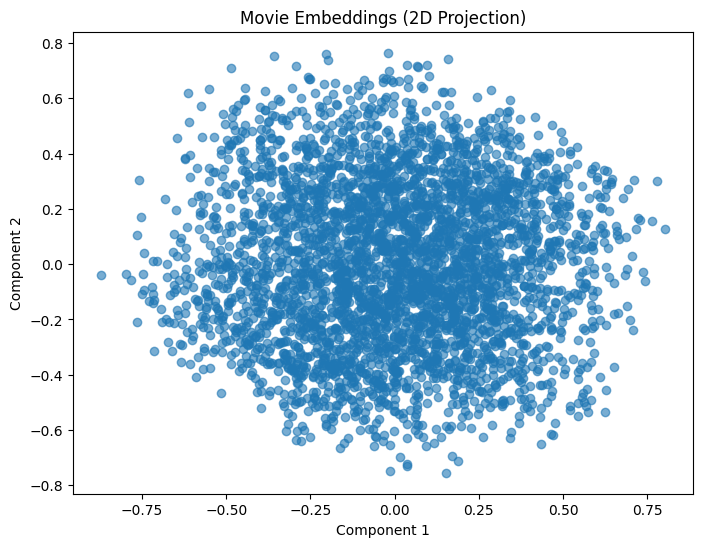

In [127]:
# Visualization of Embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
Q_2d = pca.fit_transform(Q)

plt.figure(figsize=(8,6))
plt.scatter(Q_2d[:,0], Q_2d[:,1], alpha=0.6)
plt.title("Movie Embeddings (2D Projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [35]:
pip install cmfrec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.26.post1-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post13-cp312-cp312-linux_x86_64.whl size=5975920 sha256=96e69ca0ab72a7546d1dd201dbcb92920f6dbec0ac85e751a148af667c3b71ca
  Stored in directory: /root/.cache/pip/wheels/46/9d/a7/03614a1633b40dde9aeb6eb12265f9c684feba1e3d82fe05bf
Successfully built cmfrec


In [36]:
# Matrix Factorization
# Step 1: Prepare data
# cmfrec requires user/item IDs to be integers starting from 0.

from cmfrec import CMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
# Step 2: Encode user_id & movie_id

ratings_cmf = ratings.copy()

ratings_cmf["user_id"] = ratings_cmf["user_id"].astype("category").cat.codes
ratings_cmf["movie_id"] = ratings_cmf["movie_id"].astype("category").cat.codes


In [38]:
# Step 3: Train-test split

train_df, test_df = train_test_split(
    ratings_cmf, test_size=0.2, random_state=42
)


In [39]:
# Step 4: Create user–item matrix

R = train_df.pivot(
    index="user_id",
    columns="movie_id",
    values="rating"
).fillna(0).values


In [40]:
# Step 5: Train Matrix Factorization model

model = CMF(
    k=4,                 # same as n_factors=4
    maxiter=50,
    lambda_=0.1,
    verbose=False,
    user_bias=True,
    item_bias=True,
    random_state=42
)

model.fit(R)



Collective matrix factorization model
(explicit-feedback variant)


In [41]:
# Step 6: Predict

u = test_df["user_id"].values
i = test_df["movie_id"].values

preds = model.predict(u, i)


**Q9.** Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

In [44]:
# RMSE Calculation

rmse = np.sqrt(mean_squared_error(
    test_df["rating"].values,
    preds
))

print("RMSE:", rmse)


RMSE: 3.4234561141399045


In [45]:
# MAPE Calculation

mask = test_df["rating"].values != 0

mape = np.mean(
    np.abs(
        (test_df["rating"].values[mask] - preds[mask]) /
        test_df["rating"].values[mask]
    )
) * 100

print("MAPE:", mape)


MAPE: 88.43864731965168


**Q10.** Give the sparse ‘row’ matrix representation for the following dense matrix -
[[1 0]
[3 7]]

In [ ]:
# Final CSR Representation

data    = [1, 3, 7]
indices = [0, 0, 1]
indptr  = [0, 1, 3]


In [48]:

!pip install surprise #--upgrade --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554989 sha256=47a058155b8d282ad8c39105fe80e9f0a96468a85f7685bc55286485077bc691
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [49]:
# Matrix Factorization (Surprise)

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(
    df[["user_id","movie_id","rating"]], reader
)

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=4)
model.fit(trainset)

preds = model.test(testset)


In [50]:
rmse = accuracy.rmse(preds)
print("RMSE:", rmse)

RMSE: 0.8834
RMSE: 0.8833558988745056


In [51]:
# MAPE

mape = np.mean([
    abs((p.r_ui - p.est)/p.r_ui)
    for p in preds if p.r_ui != 0
]) * 100

print("MAPE:", mape)

MAPE: 26.97878647310813


In [52]:
# Embeddings (Item & User)

user_embeddings = model.pu
item_embeddings = model.qi


In [53]:
# Item-Item Similarity using Embeddings

cosine_similarity(item_embeddings)


array([[ 1.        , -0.1133258 ,  0.16759475, ..., -0.87282324,
         0.31897832,  0.00779235],
       [-0.1133258 ,  1.        , -0.28406655, ...,  0.26276628,
        -0.74949254, -0.50848713],
       [ 0.16759475, -0.28406655,  1.        , ..., -0.61466658,
         0.14417639, -0.35475341],
       ...,
       [-0.87282324,  0.26276628, -0.61466658, ...,  1.        ,
        -0.41331653,  0.21290537],
       [ 0.31897832, -0.74949254,  0.14417639, ..., -0.41331653,
         1.        ,  0.00665426],
       [ 0.00779235, -0.50848713, -0.35475341, ...,  0.21290537,
         0.00665426,  1.        ]])

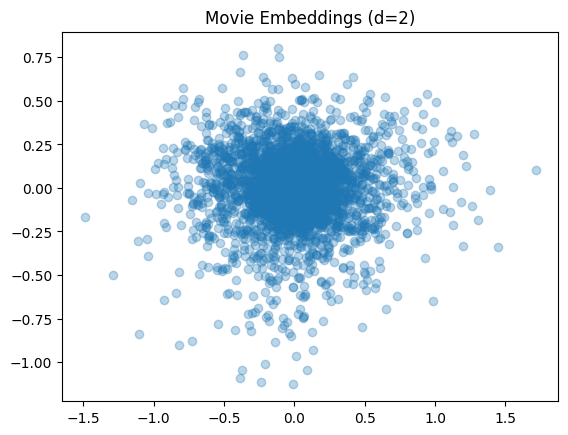

In [54]:
# Bonus: d=2 Visualization

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(item_embeddings)

plt.scatter(reduced[:,0], reduced[:,1], alpha=0.3)
plt.title("Movie Embeddings (d=2)")
plt.show()




**Build a Recommender System based Pearson Correlation. (Optional)**

    Use the User-based approach to create a recommender system that uses Pearson Correlation



In [55]:
# 1️ New user rates a few movies

new_user_ratings = {
    "Toy Story (1995)": 5,
    "Liar Liar (1997)": 4,
    "Matrix, The (1999)": 5,
    "Titanic (1997)": 2
}

new_user_df = pd.DataFrame(
    list(new_user_ratings.items()),
    columns=["title", "Rating"]
)


In [56]:
# 2️ Find users with maximum movie overlap

# Merge new user ratings with existing data
merged = df.merge(
    new_user_df,
    on="title",
    #suffixes=("_old", "_new")
)


# Count common movies per user
overlap_counts = (
    merged.groupby("user_id")["title"]
    .count()
    .sort_values(ascending=False)
)

# Take top 100 users with most overlap
top_users = overlap_counts.head(100).index


In [57]:
merged

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,decade,Rating
0,1,1721,4,978300055,F,1,10,48067,Titanic (1997),Drama|Romance,1997.0,1990.0,2
1,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy,1995.0,1990.0,5
2,2,2571,4,978299773,M,56,16,70072,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999.0,1990.0,5
3,5,1485,3,978246576,M,25,20,55455,Liar Liar (1997),Comedy,1997.0,1990.0,4
4,5,2571,5,978244493,M,25,20,55455,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999.0,1990.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,6036,2571,3,956712439,F,25,15,32603,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999.0,1990.0,5
6875,6036,1721,4,956709349,F,25,15,32603,Titanic (1997),Drama|Romance,1997.0,1990.0,2
6876,6037,2571,2,956718919,F,45,1,76006,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999.0,1990.0,5
6877,6040,1,3,957717358,M,25,6,11106,Toy Story (1995),Animation|Children's|Comedy,1995.0,1990.0,5


In [58]:
# 3️ Compute Pearson similarity (User ↔ User)

from scipy.stats import pearsonr

similarity_scores = {}

for user in top_users:
    user_data = merged[merged["user_id"] == user]

    if len(user_data) >= 2:  # Pearson needs ≥2 points
        sim, _ = pearsonr(
            user_data["Rating"],  # new user
            user_data["rating"]   # existing user
        )
        if not np.isnan(sim):
            similarity_scores[user] = sim


In [59]:
sim_df = (
    pd.DataFrame.from_dict(similarity_scores, orient="index", columns=["Similarity"])
    .sort_values(by="Similarity", ascending=False)
)


In [60]:
#  4️ Weight ratings by similarity

top_sim_users = sim_df.head(10).index

weighted_ratings = df[df["user_id"].isin(top_sim_users)].merge(
    sim_df, left_on="user_id", right_index=True
)




In [61]:
weighted_ratings

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,year,decade,Similarity
41560,284,2987,4,976749417,M,25,12,91910,Who Framed Roger Rabbit? (1988),Adventure|Animation|Film-Noir,1988.0,1980.0,0.942809
41561,284,575,2,976574475,M,25,12,91910,"Little Rascals, The (1994)",Children's|Comedy,1994.0,1990.0,0.942809
41562,284,3930,1,976571179,M,25,12,91910,"Creature From the Black Lagoon, The (1954)",Horror,1954.0,1950.0,0.942809
41563,284,1320,2,976574911,M,25,12,91910,Alien³ (1992),Action|Horror|Sci-Fi|Thriller,1992.0,1990.0,0.942809
41564,284,2123,2,976576114,M,25,12,91910,All Dogs Go to Heaven (1989),Animation|Children's,1989.0,1980.0,0.942809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
880746,5319,1092,4,960875619,M,18,17,94941,Basic Instinct (1992),Mystery|Thriller,1992.0,1990.0,0.936586
880747,5319,1093,4,960866628,M,18,17,94941,"Doors, The (1991)",Drama|Musical,1991.0,1990.0,0.936586
880748,5319,1097,3,960864858,M,18,17,94941,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,1982.0,1980.0,0.936586
880749,5319,3785,3,988241675,M,18,17,94941,Scary Movie (2000),Comedy|Horror,2000.0,2000.0,0.936586


In [62]:
weighted_ratings["WeightedRating"] = (
    weighted_ratings["rating"] * weighted_ratings["Similarity"]
)

In [63]:
# 5️ Recommend top movies

# Exclude movies already rated by new user
watched_movies = set(new_user_df["title"])

recommendations = (
    weighted_ratings[~weighted_ratings["title"].isin(watched_movies)]
    .groupby("title")
    .agg(
        Score=("WeightedRating", "sum"),
        SimilaritySum=("Similarity", "sum")
    )
)

recommendations["FinalScore"] = (
    recommendations["Score"] / recommendations["SimilaritySum"]
)

top_recommendations = (
    recommendations.sort_values(by="FinalScore", ascending=False)
    .head(10)
)


In [64]:
print(top_recommendations)


                                                        Score  SimilaritySum  \
title                                                                          
Fly Away Home (1996)                                 9.847319       1.969464   
March of the Wooden Soldiers (a.k.a. Laurel & H...   4.923660       0.984732   
Best Years of Our Lives, The (1946)                  4.923660       0.984732   
Paths of Glory (1957)                               14.468164       2.893633   
Free Enterprise (1998)                               4.923660       0.984732   
Henry V (1989)                                       9.637705       1.927541   
Amateur (1994)                                       4.923660       0.984732   
Man Who Knew Too Little, The (1997)                  4.682929       0.936586   
Exotica (1994)                                       4.714045       0.942809   
Picnic at Hanging Rock (1975)                        4.830459       0.966092   

                                       